<a href="https://colab.research.google.com/github/divyanjali2/mitm_flask_app/blob/frontend-implementation%2Fnavodya/Research_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Friday-WorkingHours-Afternoon.csv'

# Load CSV into DataFrame
df = pd.read_csv(file_path)

# Preview
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
#Check for row and columns
print(df.shape)

(225745, 85)


In [ ]:
# Confirm headers
print(df.columns)

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [ ]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

In [ ]:
 # Check class balance
df[' Label'].value_counts()

,count
Label,
MITM,128027
BENIGN,97718


In [ ]:
df[' Label'] = df[' Label'].map({'BENIGN': 0, 'MITM': 1})

In [ ]:
print(df[' Label'].unique())

[0 1]


In [ ]:
print(df[' Label'].value_counts())

 Label
1    128027
0     97718
Name: count, dtype: int64


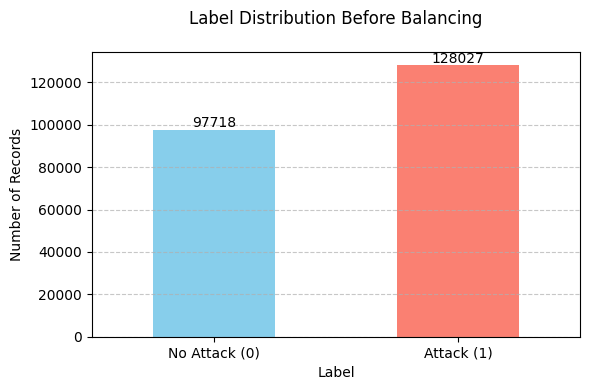

In [ ]:
import matplotlib.pyplot as plt

df.columns = df.columns.str.strip()

# Count label values
label_counts = df['Label'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Labels and title
plt.title('Label Distribution Before Balancing', pad=20)
plt.xlabel('Label')
plt.ylabel('Number of Records')
plt.xticks(ticks=[0, 1], labels=['No Attack (0)', 'Attack (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show value on top of each bar
for i, val in enumerate(label_counts):
    plt.text(i, val + 1000, str(val), ha='center')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_attack = df[df[' Label'] == 1]
df_normal = df[df[' Label'] == 0]

# Downsample the majority class (attacks)
df_attack_downsampled = resample(df_attack,
                                 replace=False,
                                 n_samples=len(df_normal),
                                 random_state=42)

# Combine balanced classes
df_balanced = pd.concat([df_normal, df_attack_downsampled])

In [ ]:
df_balanced[' Label'].value_counts()

,count
Label,
0,97718
1,97718


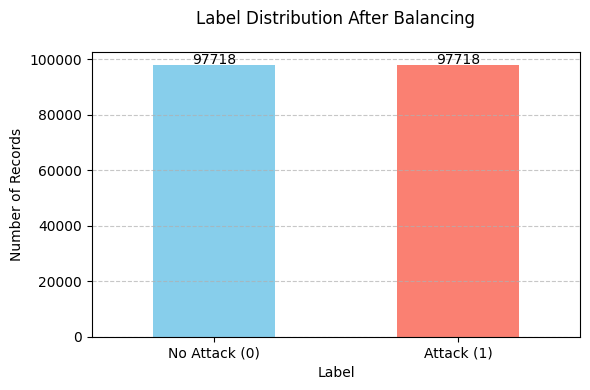

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

label_counts = df_balanced[' Label'].value_counts()

# Plotting
plt.figure(figsize=(6,4))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Axis labeling
plt.title('Label Distribution After Balancing', pad=20)
plt.xlabel('Label')
plt.ylabel('Number of Records')
plt.xticks(ticks=[0, 1], labels=['No Attack (0)', 'Attack (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, val in enumerate(label_counts):
    plt.text(i, val + 500, str(val), ha='center')

plt.tight_layout()
plt.show()